In [122]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
#import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
#currently installed theme will be used to
#set plot style if no arguments provided
jtplot.reset()
# jtplot.style(theme='grade3')
#now load this dataset 
h5f = h5py.File('./D10k.h5','r')
X = h5f['sizes'][:]
Y = h5f['spectrum'][:]
#P = h5f['physics'][:]
X = (X - 10.0) / 90.0
X = 2*(X - 0.1)/(0.9) - 1.0
#XP = np.concatenate((X,P), axis=1)
#create a phys based x and a normal x
Sz = 10000
#create a train - test split of the dataset
#xp_train, xp_test, y_train, y_test = train_test_split(XP[:Sz], Y[:Sz], test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(X[:Sz], Y[:Sz], test_size=0.2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
#x_train = np.concatenate((x_train, xtop))
x_train.shape

(8000, 16)

In [124]:
xtop = np.loadtxt('xtapp.dat')
ytop = np.loadtxt('ytapp.dat')
x_train = np.concatenate((x_train, xtop))
y_train = np.concatenate((y_train, ytop))
print(x_train.shape)
print(y_train.shape)
#y_train.shape

(10306, 16)
(10306, 64)


In [117]:
import scnets as scn

model = scn.fullycon_mse(in_size=16, 
                     out_size=64, 
                     batch_size=64,
                     N_hidden=3, 
                     N_neurons=128, 
                     N_gpus=1)


history3 = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_test, y_test))

model.save_weights("hs_8k.h5")
#print("Saved model to disk")

Train on 19775 samples, validate on 2000 samples
Epoch 1/100
19775/19775 [==============================] - 3s 173us/step - loss: 0.0518 - calc_mre_K: 67.3940 - val_loss: 0.0766 - val_calc_mre_K: 67.5759
Epoch 2/100
19775/19775 [==============================] - 2s 108us/step - loss: 0.0376 - calc_mre_K: 69.7710 - val_loss: 0.0723 - val_calc_mre_K: 73.2913
Epoch 3/100
19775/19775 [==============================] - 2s 108us/step - loss: 0.0363 - calc_mre_K: 70.0128 - val_loss: 0.0715 - val_calc_mre_K: 71.4163
Epoch 4/100
19775/19775 [==============================] - 2s 108us/step - loss: 0.0358 - calc_mre_K: 69.6232 - val_loss: 0.0705 - val_calc_mre_K: 73.1993
Epoch 5/100
19775/19775 [==============================] - 2s 109us/step - loss: 0.0356 - calc_mre_K: 69.5358 - val_loss: 0.0707 - val_calc_mre_K: 69.9211
Epoch 6/100
19775/19775 [==============================] - 2s 109us/step - loss: 0.0353 - calc_mre_K: 69.7398 - val_loss: 0.0701 - val_calc_mre_K: 72.0379
Epoch 7/100
19775/197

19775/19775 [==============================] - 2s 107us/step - loss: 0.0342 - calc_mre_K: 71.4095 - val_loss: 0.0686 - val_calc_mre_K: 74.0257
Epoch 54/100
19775/19775 [==============================] - 2s 107us/step - loss: 0.0342 - calc_mre_K: 71.4027 - val_loss: 0.0690 - val_calc_mre_K: 74.3138
Epoch 55/100
19775/19775 [==============================] - 2s 106us/step - loss: 0.0342 - calc_mre_K: 71.0511 - val_loss: 0.0688 - val_calc_mre_K: 73.8780
Epoch 56/100
19775/19775 [==============================] - 2s 106us/step - loss: 0.0342 - calc_mre_K: 71.2258 - val_loss: 0.0686 - val_calc_mre_K: 73.5434
Epoch 57/100
19775/19775 [==============================] - 2s 106us/step - loss: 0.0342 - calc_mre_K: 71.1191 - val_loss: 0.0691 - val_calc_mre_K: 74.0347
Epoch 58/100
19775/19775 [==============================] - 2s 106us/step - loss: 0.0342 - calc_mre_K: 71.3612 - val_loss: 0.0687 - val_calc_mre_K: 73.6024
Epoch 59/100
19775/19775 [==============================] - 2s 106us/step - l

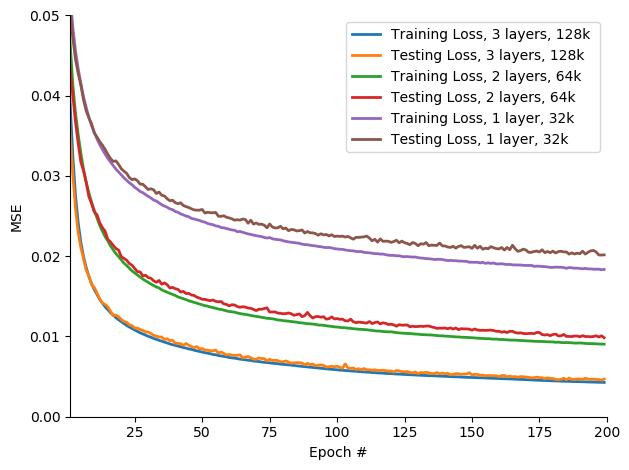

In [63]:
import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True
plt.grid(False)
plt.xlabel('Epoch #')    
plt.ylabel('MSE')
plt.xlim([1, 200])
plt.ylim([0,0.05])

plt.plot(history.history['loss'], linewidth=2,label='Training Loss, 3 layers, 128k ')
plt.plot(history.history['val_loss'],linewidth=2, label='Testing Loss, 3 layers, 128k')
plt.plot(history3.history['loss'], linewidth=2,label='Training Loss, 2 layers, 64k ')
plt.plot(history3.history['val_loss'],linewidth=2, label='Testing Loss, 2 layers, 64k')
plt.plot(history2.history['loss'], linewidth=2,label='Training Loss, 1 layer, 32k ')
plt.plot(history2.history['val_loss'], linewidth=2, label='Testing Loss, 1 layer, 32k')
plt.legend()
plt.tight_layout()
plt.savefig('trnhist.pdf', dpi=1600)

In [11]:
import scnets as scn
model_s= scn.fullycon(in_size=16, 
                     out_size=64, 
                     batch_size=64,
                     N_hidden=3, 
                     N_neurons=128, 
                     N_gpus=1)
model_s.summary()

history2 = model_s.fit(x_train, y_train,
                    batch_size=64,
                    epochs=200, 
                    verbose=1,
                    validation_data=(x_test, y_test))

model_s.save_weights("ssim_128k_05.h5")
print("Saved model to disk")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Dense)                (None, 128)               2176      
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
H0 (Dense)                   (None, 128)               16512     
_________________________________________________________________
H1 (Dense)                   (None, 128)               16512     
_________________________________________________________________
H2 (Dense)                   (None, 128)               16512     
_________________________________________________________________
last (Dense)                 (None, 64)                8256      
Total params: 59,968
Trainable params: 59,968
Non-trainable params: 0
_________________________________________________________________
Train 

128000/128000 [==============================] - 21s 161us/step - loss: 0.1387 - calc_mre_K: 58.7927 - val_loss: 0.1382 - val_calc_mre_K: 58.8415
Epoch 97/200
128000/128000 [==============================] - 21s 162us/step - loss: 0.1386 - calc_mre_K: 58.7736 - val_loss: 0.1408 - val_calc_mre_K: 58.1682
Epoch 98/200
128000/128000 [==============================] - 21s 161us/step - loss: 0.1383 - calc_mre_K: 58.5525 - val_loss: 0.1397 - val_calc_mre_K: 60.7356
Epoch 99/200
128000/128000 [==============================] - 21s 161us/step - loss: 0.1381 - calc_mre_K: 58.3074 - val_loss: 0.1396 - val_calc_mre_K: 58.8748
Epoch 100/200
128000/128000 [==============================] - 21s 161us/step - loss: 0.1380 - calc_mre_K: 58.4894 - val_loss: 0.1375 - val_calc_mre_K: 58.6838
Epoch 101/200
128000/128000 [==============================] - 21s 162us/step - loss: 0.1378 - calc_mre_K: 58.2127 - val_loss: 0.1415 - val_calc_mre_K: 58.7609
Epoch 102/200
128000/128000 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



128000/128000 [==============================] - 21s 161us/step - loss: 0.1304 - calc_mre_K: 56.4007 - val_loss: 0.1305 - val_calc_mre_K: 56.5474
Epoch 166/200
128000/128000 [==============================] - 21s 161us/step - loss: 0.1302 - calc_mre_K: 56.5597 - val_loss: 0.1319 - val_calc_mre_K: 55.7157
Epoch 167/200
128000/128000 [==============================] - 21s 162us/step - loss: 0.1302 - calc_mre_K: 56.1821 - val_loss: 0.1317 - val_calc_mre_K: 56.9958
Epoch 168/200
128000/128000 [==============================] - 21s 162us/step - loss: 0.1299 - calc_mre_K: 56.5006 - val_loss: 0.1304 - val_calc_mre_K: 57.1218
Epoch 169/200
128000/128000 [==============================] - 21s 161us/step - loss: 0.1301 - calc_mre_K: 56.5892 - val_loss: 0.1289 - val_calc_mre_K: 56.4132
Epoch 170/200
128000/128000 [==============================] - 21s 161us/step - loss: 0.1299 - calc_mre_K: 56.3434 - val_loss: 0.1291 - val_calc_mre_K: 55.9436
Epoch 171/200
128000/128000 [=========================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



samps = X[200000:201000]
sampsp = XP[200000:201000]
actu = Y[200000:201000]

In [ ]:
Spred = model2.predict(samps)
#Ppred = model.predict(samps)


In [ ]:
from skimage.metrics import structural_similarity as ssim

def mse(x, y):
    return np.linalg.norm(x - y)




indexx = np.random.randint(0,1000)
plt.plot(Spred[indexx], label='ssim')
#plt.plot(Ppred[indexx], label='mse')
plt.plot(actu[indexx], label='actual')
#plt.plot(P[indexx], label='approx')
plt.legend()

print(ssim(Spred[indexx], actu[indexx], data_range=1))
print(mse(Spred[indexx], actu[indexx]))
plt.ylim([0,1])

In [ ]:
# model_json = model2.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("ssim_64k_0.h5")
print("Saved model to disk")

In [ ]:
model2.save('mre_64k.h5')

In [ ]:
from keras.layers import Flatten, Activation
from keras.utils.generic_utils import get_custom_objects
def swish(x):
    return (K.sigmoid(x) * x)
get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
!ls *.h5